In [1]:
import os
import tifffile as tiff
import numpy as np

# Directory containing the tif images
tif_dir = '/mnt/d/Arne/Dokumente/Python/brick_furnace_detection/data/Brick_Data_Train/Image'

# List all tif files in the directory
tif_files = [f for f in os.listdir(tif_dir) if f.lower().endswith('.tif')]
# Load all tif images into a list
tif_images = [tiff.imread(os.path.join(tif_dir, f)) for f in tif_files[1012:1012]]

mask_dir = '/mnt/d/Arne/Dokumente/Python/brick_furnace_detection/data/Brick_Data_Train/Mask'
mask_files = [f for f in os.listdir(mask_dir) if f.lower().endswith('.tif')]
mask_images = [tiff.imread(os.path.join(mask_dir, f)) for f in mask_files[1012:1012]]


# Optionally, stack into a numpy array if all images are the same shape
#tif_stack = np.stack(tif_images)

In [2]:
tif_image1012 = tiff.imread(os.path.join(tif_dir, 'Image1012.tif'))
tif_mask1012 = tiff.imread(os.path.join(mask_dir, 'Image1012.tif'))

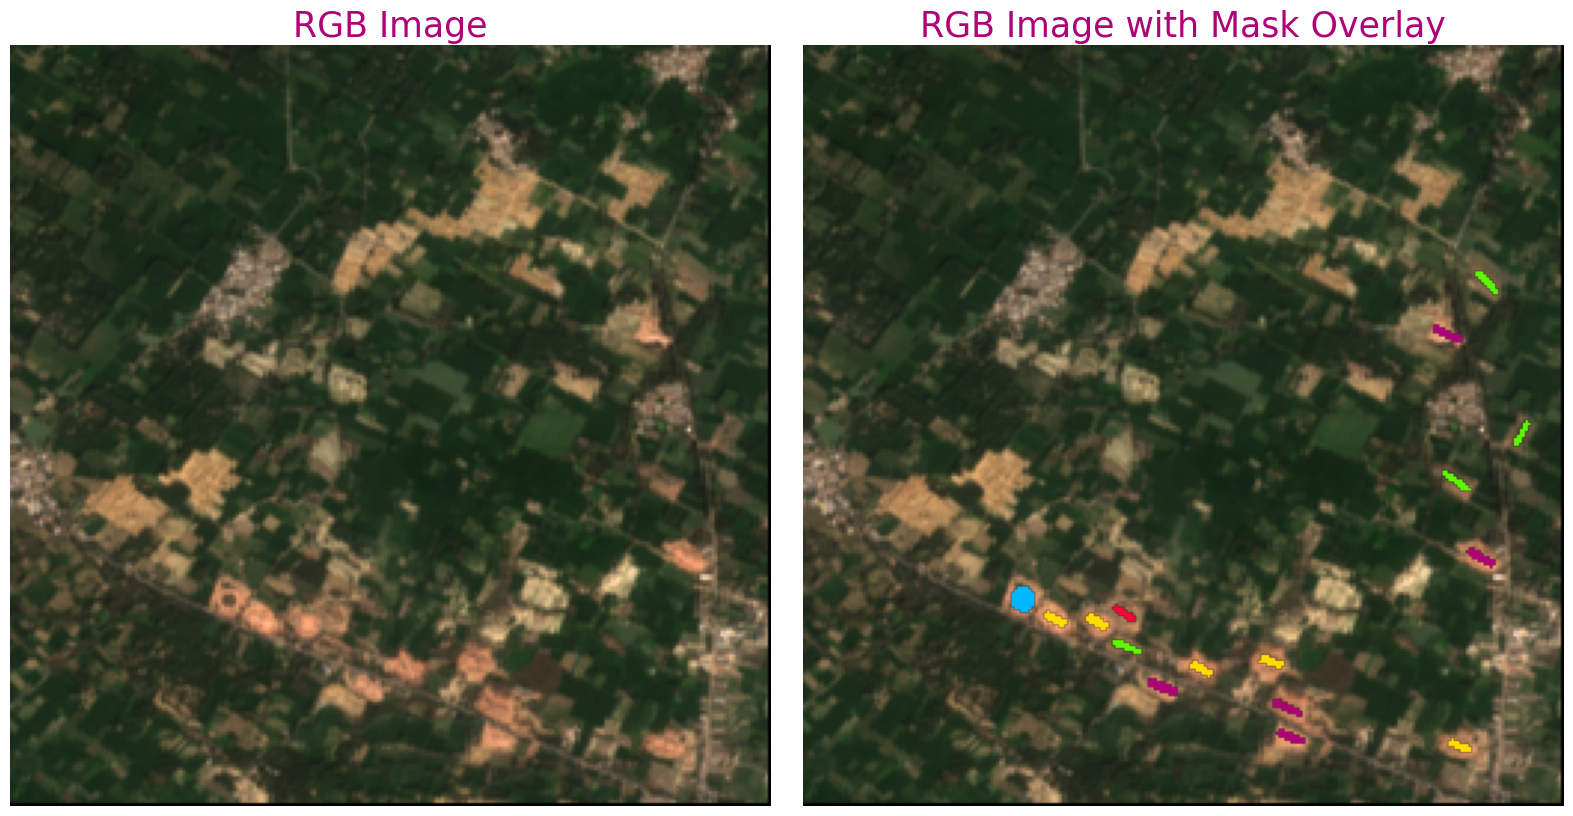

In [51]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tif_image = tif_image1012
tif_mask = tif_mask1012

rgb_img = np.clip(tif_image[:, :, [2, 1, 0]] * 3.5, 0, 1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(rgb_img)


colors = [
    "#AF0078",  
    "#ffdd04",  
    "#ff7300",  
    "#00b7ff",  
    "#f707ff",  
    "#0D30FAFF",  
    "#5df804",  
    "#ff0339"  
]

# Erstelle Colormap
cmap_8 = ListedColormap(colors)




# Overlay mask: where mask_image1 > 0, show in red with some transparency
plt.imshow(np.ma.masked_where(tif_mask <= 0, tif_mask), cmap=cmap_8)
plt.title('RGB Image with Mask Overlay', fontsize=25, color ='#AF0078')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('RGB Image', fontsize=25, color ='#AF0078')
plt.axis('off')

plt.tight_layout()
plt.show()

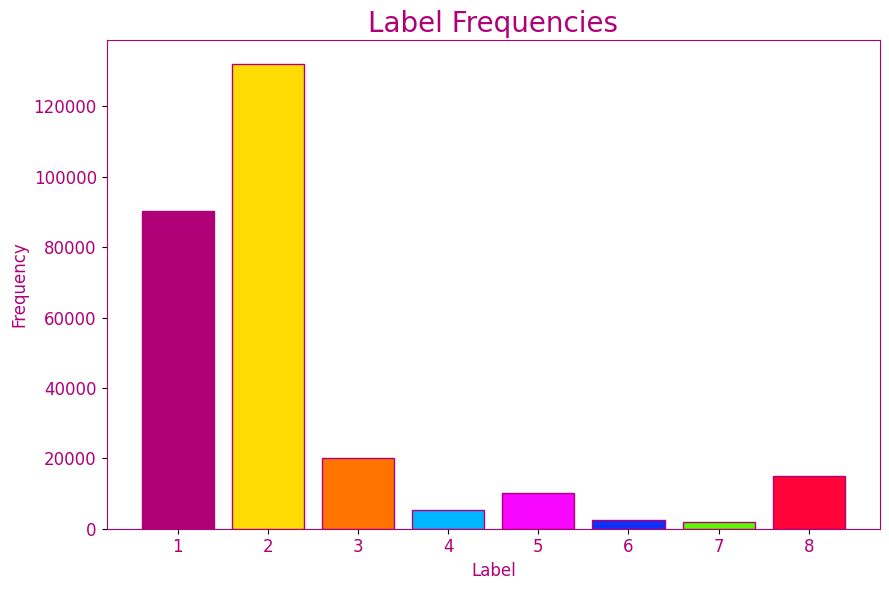

In [48]:
import matplotlib.pyplot as plt

# Label-Frequenzen (ohne Klasse 0)
label_freq = {1: 90363, 2: 132137, 3: 20223, 4: 5369, 5: 10022, 6: 2422, 7: 1843, 8: 15006}
labels = list(label_freq.keys())
counts = list(label_freq.values())

# Farben für die Balken
colors = [
    "#AF0078",  
    "#ffdd04",  
    "#ff7300",  
    "#00b7ff",  
    "#f707ff",  
    "#0D30FAFF",  
    "#5df804",  
    "#ff0339"  
]

# Farbe für UI-Elemente (Achsen, Titel, Labels usw.)
ui_color = '#AF0078'

# Plot
plt.figure(figsize=(9, 6))
bars = plt.bar(labels, counts, color=colors, edgecolor=ui_color)

# Schriftgrößen
label_fontsize = 12
tick_fontsize = 12
title_fontsize = 20

# Achsentitel & Titel einfärben
plt.xlabel('Label', color=ui_color, fontsize=label_fontsize)
plt.ylabel('Frequency', color=ui_color, fontsize=label_fontsize)
plt.title('Label Frequencies', color=ui_color, fontsize=title_fontsize)

# Ticks einfärben und Schriftgröße setzen
plt.xticks(labels, color=ui_color, fontsize=tick_fontsize)
plt.yticks(color=ui_color, fontsize=tick_fontsize)

# Achsenränder einfärben
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(ui_color)

plt.tight_layout()
plt.show()
# 